# a) Number recognizition modell:

In [16]:
import torch
import torchvision
import matplotlib.pyplot as plt

## Import data from MNIST

In [ ]:
mnist_train = torchvision.datasets.MNIST('./data', train=True, download=True)
x_train = mnist_train.data.reshape(-1, 784).float()  # Reshape input
y_train = torch.zeros((mnist_train.targets.shape[0], 10))  # Create output tensor
y_train[torch.arange(mnist_train.targets.shape[0]), mnist_train.targets] = 1  # Populate output

mnist_test = torchvision.datasets.MNIST('./data', train=False, download=True)
x_test = mnist_test.data.reshape(-1, 784).float()  # Reshape input
y_test = torch.zeros((mnist_test.targets.shape[0], 10))  # Create output tensor
y_test[torch.arange(mnist_test.targets.shape[0]), mnist_test.targets] = 1  # Populate output

## Define Softmax Model class

In [18]:
class SoftmaxModel:
    def __init__(self): 
        self.W = torch.ones([784, 10], requires_grad=True)
        self.b = torch.ones([1, 10], requires_grad=True)

    # Predictor
    def f(self, x):
        return torch.nn.functional.softmax(x @ self.W + self.b, dim=1)

    # Uses Cross Entropy
    def loss(self, x, y):
        return torch.nn.functional.binary_cross_entropy_with_logits(self.f(x), y)

## Optimize with stochastic gradient descent (SGD)

In [19]:
model = SoftmaxModel()

# set constants
epoch_count = 500
step_length = 0.1

# Optimize: adjust W and b to minimize loss using stochastic gradient descent
optimizer = torch.optim.SGD([model.W, model.b], step_length)

for epoch in range(epoch_count):
    
    model.loss(x_train, y_train).backward()  # Compute loss gradients

    optimizer.step()  # Perform optimization by adjusting W and b,

    optimizer.zero_grad()  # Clear gradients for next step

## Visualize data

loss = 0.6633917689323425
accuracy = 0.9172333478927612


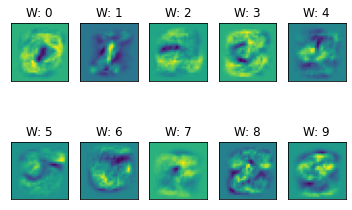

In [20]:
print("loss = %s" % (model.loss(x_train, y_train).item()))
print("accuracy = %s" % ( torch.mean(torch.eq(model.f(x_train).argmax(1), y_train.argmax(1)).float()).item() ))


for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(model.W[:, i].detach().numpy().reshape(28, 28))
    plt.title(f'W: {i}')
    plt.xticks([])
    plt.yticks([])

plt.show()